Name: Gajaanan S.
Index No: 190185D

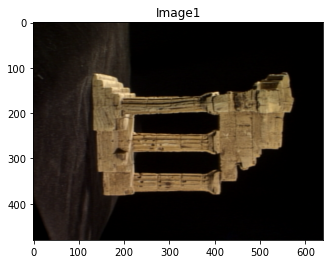

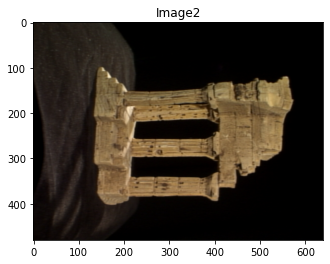

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.linalg import null_space
f = open('templeSR_par.txt')
assert f is not None
n = int(f.readline())

#Read the information of the first image

l = f.readline().split()
im1_fn = l[0]

K1 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R1 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t1 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the information of the second image

l = f.readline().split()
im2_fn = l[0]

K2 = np.array([float(i) for i in l[1:10]]).reshape((3,3))
R2 = np.array([float(i) for i in l[10:19]]).reshape((3,3))
t2 = np.array([float(i) for i in l[19:22]]).reshape((3,1))

#Read the 2 image and show

im1 = cv.imread(r'./templeSparseRing/' + im1_fn ,cv.IMREAD_COLOR)
im2 = cv.imread(r'./templeSparseRing/' + im2_fn ,cv.IMREAD_COLOR)
assert im1 is not None
assert im2 is not None
#cv.namedWindow('Im')
#cv.imshow('Im',im1)
#cv.waitKey(0)
#cv.imshow('Im',im2)
#cv.waitKey(0)
#cv.destroyAllWindows()
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)
plt.imshow(im1)
plt.title('Image1')
plt.show()
plt.imshow(im2)
plt.title('Image2')
plt.show()

#Compute P1 and P2

P1 = K1 @ np.hstack((R1,t1)) # P = K*[R|t]
P2 = K2 @ np.hstack((R2,t2)) # P = K*[R|t]

F = [[-2.87071497e-04 -3.96261289e-02  2.94221686e+02]
 [-3.55039713e-02  1.65329260e-04  1.78860854e+01]
 [-2.76702814e+02  2.12942175e+01 -9.06669374e+03]]


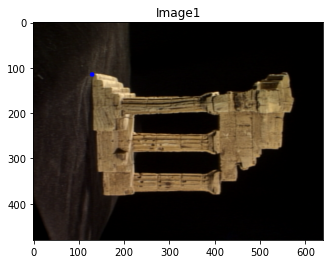

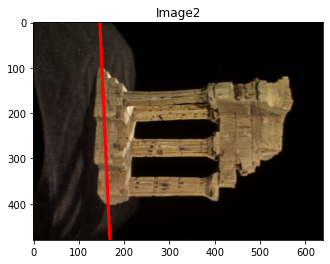

In [21]:
#Compute F

def skew(x):
    x=x.ravel()
    return np.array([[0,-x[2],x[1]],[x[2],0,-x[0]],[-x[1],x[0],0]])
C = null_space(P1)
C = C * np.sign(C[0,0])
e2 = P2 @ C
e2x = skew(e2)
F = e2x @P2 @ np.linalg.pinv(P1)
print('F =',F)

#Compute the epipolar line corresponding to the given x and plot

x = np.array([130,115,1])
cv.circle(im1,(x[0],x[1]),5,(0,0,255),-1)
l2 = F @ x.T
p1 = np.array([0,(l2[0]*0 + l2[2])/l2[1]]).astype(int)
p2 = np.array([500,(l2[0]*500+l2[2])/l2[1]]).astype(int)
cv.line(im2,(p1[0],p1[1]),(p2[0],p2[1]),(255,0,0),5)
#cv.namedWindow('Im')
#cv.imshow('Im',im1)
#cv.waitKey(0)
#cv.imshow('Im',im2)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.imshow(im1)
plt.title('Image1')
plt.show()
plt.imshow(im2)
plt.title('Image2')
plt.show()